<div style="text-align:center; font-size:24px;"><b>FlightAware's AeroAPI</b></div>

[AeroAPI](https://www.flightaware.com/commercial/aeroapi/) is a simple, query-based API that gives software developers access to a variety of FlightAware's flight data. Users can obtain current or historical data. AeroAPI is a RESTful API delivering accurate and actionable aviation data. This notebook uses the library [aeroapi-python](https://github.com/derens99/aeroapi-python) that I installed with PyPi using <span style="background-color:honeydew;">pip install aeroapi-python</span>

In [1]:
# imports
import os
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from aeroapi_python import AeroAPI

To protect your API key set an environment variable on your computer to the key. I created one named **AEROAPI_KEY**.
The ***_os_*** library in python can retrieve this value and you can save it to a variable.

In [2]:
# Accessing the environment variable
api_key = os.environ.get('AEROAPI_KEY')

# Check if the environment variable exists
if api_key is not None:
    pass
else:
    print("FlightAware API Key not found in environment variables.")

In [3]:
# Load your API key into the Class
aeroapi = AeroAPI(api_key)

# Give the Class a base url for the API
aeroapi.base_url = 'https://aeroapi.flightaware.com/aeroapi'

# Instantiate the api_caller
api_caller = aeroapi.api_caller

In [4]:
def get_airport_info(airport_code):
    api_data = api_caller.get(f'airports/{airport_code}')
    df = pd.DataFrame.from_dict(api_data, orient='index').transpose().iloc[:, :12]
    
    return api_data, df    

#### Here is a list of airports to try, feel free to explore with others!

1.  Hartsfield-Jackson Atlanta International Airport (**ATL**)
2.  Los Angeles International Airport (**LAX**)
3.  O'Hare International Airport (**ORD**)
4.  Dallas/Fort Worth International Airport (**DFW**)
5.  Denver International Airport (**DEN**)
6.  John F. Kennedy International Airport (**JFK**)
7.  San Francisco International Airport (**SFO**)
8.  Seattle-Tacoma International Airport (**SEA**)
9.  McCarran International Airport (**LAS**)
10. Charlotte Douglas International Airport (**CLT**)
<br>
<br>


PLEASE ENTER AIRPORT IDENTIFICATION: KTKI


,airport_code,alternate_ident,name,type,elevation,city,state,longitude,latitude
0,KTKI,TKI,McKinney National,Airport,588,Dallas,TX,-96.588767,33.177065


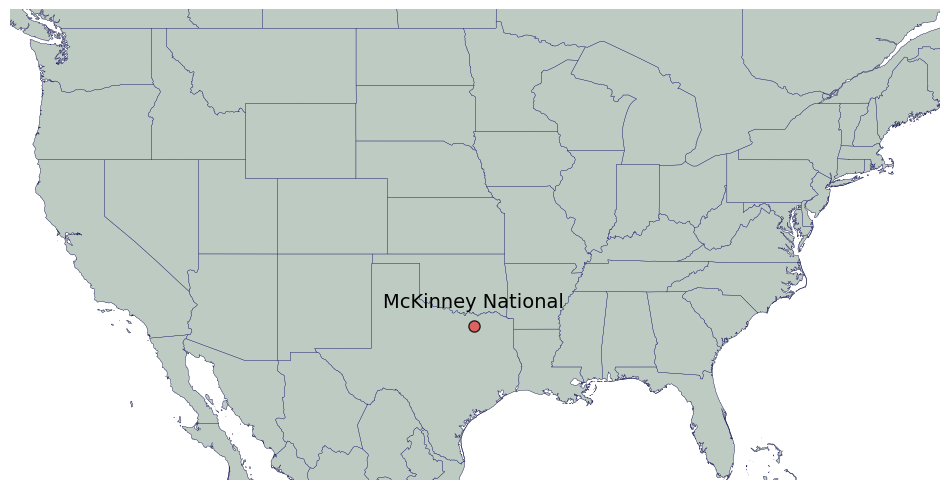

In [5]:
AIRPORT = str(input("PLEASE ENTER AIRPORT IDENTIFICATION: ")).upper()


api_data, df = get_airport_info(AIRPORT)


# Plot the airport on a map
data = {'Airport Name': [api_data['name']],
        'Latitude': [api_data['latitude']],
        'Longitude': [api_data['longitude']]
       }

# Create a GeoDataFrame from the city data
geometry = [Point(lon, lat) for lon, lat in zip(data['Longitude'], data['Latitude'])]
gdf_cities = gpd.GeoDataFrame(data, geometry=geometry, crs='EPSG:4326')

# Download the world basemap for context
world = gpd.read_file('ne_10m_land_data/ne_10m_land.dbf')

# Set up the plotting extent for the United States
us_extent = [-126, -67, 25, 50]  # [minx, maxx, miny, maxy]

# Plot the basemap with the specified extent
fig,ax = plt.subplots(figsize=(12,10))

world.plot(ax=ax,
           color='#becbc2',
           edgecolor='#505050',
           linewidth=0.2)

ax.set_xlim(us_extent[0], us_extent[1])
ax.set_ylim(us_extent[2], us_extent[3])

# Load state boundaries data
us_states = gpd.read_file(
    'ne_10m_admin_1_states_provinces_data/ne_10m_admin_1_states_provinces.dbf'
)

us_states = us_states.cx[us_extent[0]:us_extent[1], us_extent[2]:us_extent[3]]

# Plot state boundaries with a different color
us_states.boundary.plot(ax=ax, linewidth=0.2, color='MidnightBlue')

# Plot the GeoDataFrame points on top with customized colors
gdf_cities.plot(ax=ax,
                marker='o',
                color='#E34949',
                edgecolor='black',
                markersize=65,
                alpha=0.8)

# Annotate each point with the Airport's Name
for x, y, label in zip(gdf_cities.geometry.x,
                       gdf_cities.geometry.y+1,
                       gdf_cities['Airport Name']):
    
    ax.text(x, y, label, fontsize=14, ha='center')

# Remove axis labels
ax.set_axis_off()


# Show the plot and associated data
display(df.iloc[:, [0, 1, 5, 6, 7, 8, 9, 10, 11]])
plt.show()

#### Download Map Data Here:
[ne_10m_admin_1_states_provinces.dbf](https://www.naturalearthdata.com/downloads/10m-cultural-vectors/)
&nbsp; **and** &nbsp;
[ne_10m_land.dbf](https://www.naturalearthdata.com/downloads/10m-physical-vectors/)